# Method chaining workbook

## Introduction

This is the workbook component of the "Method chaining" section of the tutorial. For the reference component, click [here](https://www.kaggle.com/residentmario/method-chaining-reference).

* [Method Chaining Section of the Modern Pandas Tutorial](https://tomaugspurger.github.io/method-chaining.html) - http://archive.is/Jl7JW

This is the last workbook in the tutorial. Congratulations! In this section we will put all of the things that we learned together to do some truly interesting things with some datasets. The exercises in this section are therefore also quite difficult! Try using method chaining syntax while working through the examples that follow, and make studious use of the hints that we provide.

In [52]:
import pandas as pd
pd.set_option('max_rows', 5)
from learntools.advanced_pandas.method_chaining import *

chess_games = pd.read_csv("../input/chess/games.csv")

# Checking Answers

**Check your answers in each exercise using the  `check_qN` function** (replacing `N` with the number of the exercise). For example here's how you would check an incorrect answer to exercise 1:

In [53]:
check_q1(pd.DataFrame())

False

If you get stuck, **use the `answer_qN` function to see the code with the correct answer.**

For the first set of questions, running the `check_qN` on the correct answer returns `True`.

For the second set of questions, using this function to check a correct answer will present an informative graph.

## Exercises

View your data by running the cell below

In [54]:
chess_games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


**Exercise 1**: It's well-known that in the game of chess, white has a slight first-mover advantage against black. Can you measure this effect in this dataset? Use the `winner` column to create a `pandas` `Series` showing how often white wins, how often black wins, and how often the result is a tie, as a ratio of total games played. In other words, a `Series` that looks something like this:

    white    0.48
    black    0.44
    draw     0.08
    Name: winner, dtype: float64
    
Hint: use `len` to get the length of the initial `DataFrame`, e.g. the count of all games played.

In [55]:
chess_games['winner'].value_counts() / len(chess_games)

white    0.498604
black    0.454033
draw     0.047363
Name: winner, dtype: float64

In [56]:
print(check_q1(chess_games['winner'].value_counts() / len(chess_games)))

True


In [57]:
print(answer_q1())

chess_games['winner'].value_counts() / len(chess_games)
None


**Exercise 2**: The `opening_name` field of the `chess_games` dataset provides interesting data on what the most commonly used chess openings are.  However, it gives a bit _too_ much detail, including information on the variation used for the most common opening types. For example, rather than giving `Queen's Pawn Game`, the dataset often includes `Queen's Pawn Game: Zukertort Variation`.

This makes it a bit difficult to use for categorical purposes. Here's a function that can be used to separate out the "opening archetype":

 ```python
 lambda n: n.split(":")[0].split("|")[0].split("#")[0].strip()
 ```

Use this function to parse the `opening_name` field and generate a `pandas` `Series` counting how many times each of the "opening archetypes" gets used. Hint: use a map.

In [58]:
(chess_games
    .opening_name
    .map(lambda n: n.split(":")[0].split("|")[0].split("#")[0].strip())
    .value_counts()
)

Sicilian Defense       2632
French Defense         1412
                       ... 
Valencia Opening          1
Pterodactyl Defense       1
Name: opening_name, Length: 143, dtype: int64

In [59]:
print(check_q2((chess_games
    .opening_name
    .map(lambda n: n.split(":")[0].split("|")[0].split("#")[0].strip())
    .value_counts()
)))

True


In [60]:
print(answer_q2())

(chess_games
    .opening_name
    .map(lambda n: n.split(":")[0].split("|")[0].split("#")[0].strip())
    .value_counts()
)
None


**Exercise 3**: In this dataset various players play variably number of games. Group the games by `{white_id, victory_status}` and count how many times each white player ended the game in `mate` , `draw`, `resign`, etcetera. The name of the column counting how many times each outcome occurred should be `n` (hint: `rename` or `assign` may help).

In [61]:
(chess_games
    .assign(n=0)
    .groupby(['white_id', 'victory_status'])
    .n
    .apply(len)
    .reset_index()
)

,white_id,victory_status,n
0,--jim--,mate,1
1,-l-_jedi_knight_-l-,mate,1
...,...,...,...
11487,zzzbbb,resign,1
11488,zzzimon,resign,1


In [62]:
print(check_q3((chess_games
    .assign(n=0)
    .groupby(['white_id', 'victory_status'])
    .n
    .apply(len)
    .reset_index()
)))

True


In [63]:
print(answer_q3())

(chess_games
    .assign(n=0)
    .groupby(['white_id', 'victory_status'])
    .n
    .apply(len)
    .reset_index()
)
None


**Exercise 4**: There are a lot of players in the dataset who have only played one or a small handful of games. Create a `DataFrame` like the one in the previous exercise, but only include users who are in the top 20 users by number of games played. See if you can do this using method chaining alone! Hint: reuse the code from the previous example. Then, use `pipe`.

In [64]:
(chess_games
    .assign(n=0)
    .groupby(['white_id', 'victory_status'])
    .n
    .apply(len)
    .reset_index()
    .pipe(lambda df: df.loc[df.white_id.isin(chess_games.white_id.value_counts().head(20).index)]) 
)

,white_id,victory_status,n
9,1240100948,draw,3
10,1240100948,mate,7
...,...,...,...
10907,vovkakuz,outoftime,4
10908,vovkakuz,resign,23


In [65]:
print(check_q4((chess_games
    .assign(n=0)
    .groupby(['white_id', 'victory_status'])
    .n
    .apply(len)
    .reset_index()
    .pipe(lambda df: df.loc[df.white_id.isin(chess_games.white_id.value_counts().head(20).index)]) 
)))

True


In [66]:
print(answer_q4())

(chess_games
    .assign(n=0)
    .groupby(['white_id', 'victory_status'])
    .n
    .apply(len)
    .reset_index()
    .pipe(lambda df: df.loc[df.white_id.isin(chess_games.white_id.value_counts().head(20).index)]) 
)
None


Next, let's do some visual exercises.

The next exercise uses the following dataset:

In [67]:
kepler = pd.read_csv("../input/kepler-exoplanet-search-results/cumulative.csv")
kepler

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,0.000028,-0.000028,170.53875,0.00216,-0.00216,0.146,0.318,-0.146,2.9575,0.0819,-0.0819,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,0.000248,-0.000248,162.51384,0.00352,-0.00352,0.586,0.059,-0.443,4.5070,0.1160,-0.1160,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,0.681402,0.000002,-0.000002,132.18175,0.00285,-0.00285,0.147,0.309,-0.147,0.8650,0.1620,-0.1620,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,NaN,NaN,5713.41,5675.74,-1836.94,12.3,1.0,q1_q17_dr25_tce,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9563,9564,10156110,K07989.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,1,1,4.856035,0.000064,-0.000064,135.99330,0.01080,-0.01080,0.134,0.323,-0.134,3.0780,0.2830,-0.2830,76.7,10.8,-10.8,1.05,0.36,-0.12,1266.0,NaN,NaN,607.42,600.39,-194.33,8.2,1.0,q1_q17_dr25_tce,6469.0,158.0,-225.0,4.385,0.054,-0.216,1.193,0.410,-0.137,297.00977,47.121021,14.826


**Exercise 5**: The Kepler space observatory is in the business of finding potential exoplanets (planets orbiting stars other suns) and, after collecting the evidence, generating whether or not to confirm, decline to confirm, or deny that a given space body is, in fact, an exoplanet. In the dataset above, the "before" status of the body is `koi_pdisposition`, and the "after" status is `koi_disposition`. 

Using the dataset above, generate a `Series` counting all of the possible transitions between pre-disposition and post-disposition. In other words, generate a `Series` whose index is a `MultiIndex` based on the `{koi_pdisposition, koi_disposition}` fields, and whose values is a count of how many times each possible combination occurred.

In [68]:
kepler.assign(n=0).groupby(['koi_pdisposition', 'koi_disposition']).n.count()

koi_pdisposition  koi_disposition
CANDIDATE         CANDIDATE          2248
                  CONFIRMED          2248
FALSE POSITIVE    CONFIRMED            45
                  FALSE POSITIVE     5023
Name: n, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


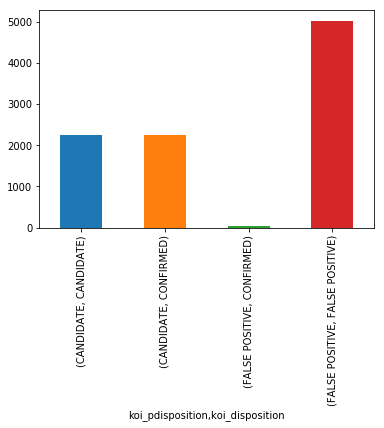

In [69]:
print(check_q5(kepler.assign(n=0).groupby(['koi_pdisposition', 'koi_disposition']).n.count()))

In [70]:
print(answer_q5())

kepler.assign(n=0).groupby(['koi_pdisposition', 'koi_disposition']).n.count()
None


The next few exercises use the following datasets:

In [71]:
wine_reviews = pd.read_csv("../input/wine-reviews/winemag-data-130k-v2.csv", index_col=0)
ramen_reviews = pd.read_csv("../input/ramen-ratings/ramen-ratings.csv", index_col=0)
print(wine_reviews.head())
print(ramen_reviews.head())

    country         ...                        winery
0     Italy         ...                       Nicosia
1  Portugal         ...           Quinta dos Avidagos
2        US         ...                     Rainstorm
3        US         ...                    St. Julian
4        US         ...                  Sweet Cheeks

[5 rows x 13 columns]
                   Brand   ...   Top Ten
Review #                   ...          
2580           New Touch   ...       NaN
2579            Just Way   ...       NaN
2578              Nissin   ...       NaN
2577             Wei Lih   ...       NaN
2576      Ching's Secret   ...       NaN

[5 rows x 6 columns]


**Exercise 6**: As we demonstrated in previous workbooks, the `points` column in the `wine_reviews` dataset is measured on a 20-point scale between 80 and 100. Create a `Series` which normalizes the ratings so that they fit on a 1-to-5 scale instead (e.g. a score of 80 translates to 1 star, while a score of 100 is five stars). Set the `Series` name to "Wine Ratings", and sort by index value (ascending).

In [72]:
(((wine_reviews['points'].dropna() - 80) / 4)
    .value_counts()
    .sort_index()
    .rename_axis("Wine Ratings")
)

Wine Ratings
0.00    397
0.25    692
       ... 
4.75     33
5.00     19
Name: points, Length: 21, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


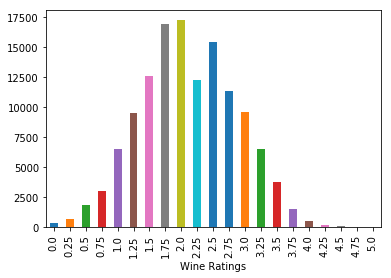

In [73]:
print(check_q6((((wine_reviews['points'].dropna() - 80) / 4)
    .value_counts()
    .sort_index()
    .rename_axis("Wine Ratings")
)))

In [74]:
print(answer_q6())

(((wine_reviews['points'].dropna() - 80) / 4)
    .value_counts()
    .sort_index()
    .rename_axis("Wine Ratings")
)
None


**Exercise 7**: The `Stars` column in the `ramen_reviews` dataset is the ramen equivalent to the similar data points in `wine_reviews`. Luckily it is already on a 0-to-5 scale, but it has some different problems...create a `Series` counting how many ramens earned each of the possible scores in the dataset. Convert the `Series` to the `float64` dtype and drop rames whose rating is `"Unrated"`. Set the name of the `Series` to "Ramen Ratings". Sort by index value (ascending).

In [75]:
(ramen_reviews
    .Stars
    .replace('Unrated', None)
    .dropna()
    .astype('float64')
    .value_counts()
    .rename_axis("Ramen Reviews")
    .sort_index())

Ramen Reviews
0.00     26
0.10      1
       ... 
4.75     64
5.00    386
Name: Stars, Length: 42, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


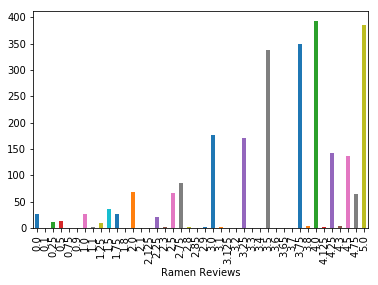

In [76]:
print(check_q7((ramen_reviews
    .Stars
    .replace('Unrated', None)
    .dropna()
    .astype('float64')
    .value_counts()
    .rename_axis("Ramen Reviews")
    .sort_index())))

In [77]:
print(answer_q7())

(ramen_reviews
    .Stars
    .replace('Unrated', None)
    .dropna()
    .astype('float64')
    .value_counts()
    .rename_axis("Ramen Reviews")
    .sort_index())
None


**Exercise 8:**: We can see from the result of the previous exercise that whilst the wine reviewers stick to a strict 20-point scale, ramen reviews occassionally deviate into fractional numbers. Modify your answer to the previous exercise by rounding review scores to the nearest half-point (so 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, or 5).

In [78]:
(ramen_reviews
     .Stars
     .replace('Unrated', None)
     .dropna()
     .astype('float64')
     .map(lambda v: round(v * 2) / 2)
     .value_counts()
     .rename_axis("Ramen Reviews")
     .sort_index()
)

Ramen Reviews
0.0     38
0.5     14
      ... 
4.5    140
5.0    450
Name: Stars, Length: 11, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


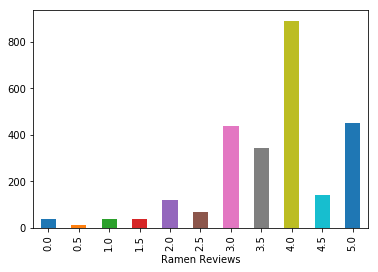

In [79]:
print(check_q8((ramen_reviews
     .Stars
     .replace('Unrated', None)
     .dropna()
     .astype('float64')
     .map(lambda v: round(v * 2) / 2)
     .value_counts()
     .rename_axis("Ramen Reviews")
     .sort_index()
)))

In [80]:
print(answer_q8())

(ramen_reviews
     .Stars
     .replace('Unrated', None)
     .dropna()
     .astype('float64')
     .map(lambda v: round(v * 2) / 2)
     .value_counts()
     .rename_axis("Ramen Reviews")
     .sort_index()
)
None


# Congratulations

You've finished the Pandas track.  Many data scientist feel efficiency with Pandas is the most useful and practical skill they have, because it allows you to progress quickly in any project you have.

You can take advantage of your Pandas skills by entering a [Kaggle Competition](https://www.kaggle.com/competitions) or answering a question you find interesting using [Kaggle Datasets](https://www.kaggle.com/datasets).